#Mass on a Spring#
Goals -

1.   Develop a theoretical model for a mass on a spring.
2. Be able to curve fit and develop an equation for your experimental data.
3. Use the theoretical model to create plots to determine how well the model fits your experimental data
4. Make a claim about the validity of the model to simulate a mass on a spring and suport your claim with evidence.  
5. Develop a greater proficiency for using Python code to help solve physics problems.



In [ ]:
# Importing the modules we'll need
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import linregress


# Experimental Section

Procedure - (I'm being brief here)
* Setup a spring on a ringstand
* Use various masses and a ruler to gather enough data to determine the spring constant. Enter those masses and displacements in the code block below.
* Place a motion sensor under the mass, pull the mass down a known amount (~4cm?), and let the mass oscillate.
* Use the motion sensor to record position vs time data and save it as a .csv for analysis.

In [ ]:
# Data for finding the spring constant
added_masses = [1,2,3,4] # separate each mass (in kg) with a ,
change_in_length = [1,2,3,4] # change in length (in m).

# Calculating Fs (which is equal to the weight of the mass)
g = 9.81 # m/s/s
force_on_spring = [m*g for m in added_masses]

# Creating the data table
k_data = pd.DataFrame({'Mass':added_masses, 'Force':force_on_spring, 'Delta x':change_in_length})

y = "?" # What do I plot on the x-axis?
x = "?" # What do I plot on the y-axis?

# doing a linear regression to find the slope and y-intercept of your data
reg = np.polyfit(x, y, 1)

# Create the best fit line from the regression data
poly1d_fn = np.poly1d(reg)

# Take a look at your best fit line
plt.title("Finding the Spring Constant")
plt.xlabel("What do I label this axis?")
plt.ylabel("What do I label this axis?")

# Plot the data and best fit line
plt.plot(x,y, 'yo', x, poly1d_fn(x), '--')

# Add labels to the graph
plt.text(3.4, 30, f'Slope = {reg[0]}', bbox=dict(facecolor='tab:blue', alpha=0.5))
plt.text(1.5, 10, f'Y-Intercept = {reg[1]:.3f}', bbox=dict(facecolor='tab:blue', alpha=0.5))

plt.show()

Questions:
1. What was the value of your spring constant?
2. Is that a reasonable result? Why?
3. How precise were your measurements? What features on the graph support your response?

# Building a Theoretical Model

The position of a mass on a spring can be described by the equation $ x=A\cos\left(\sqrt{\frac{k}{m}}t + \phi\right)$ where A is the amplitude, k is the spring constant, m is the mass attached to the spring, and $\phi$ is the phase shift. (This may look very similar to something you've seen in your math class)

The code below generates a set of data points for the mass on a spring but a line is missing. See if you can fill in the ```x =```  line using the equation above.

Hint: ```sqrt``` and ```cos``` are both in the numpy module.

In [ ]:
def getSpringData(A,k,m,shift,time_length):
  xlist = []
  tlist = []
  t = 0 #start time
  dt = 0.01 #Time between measurements
  while t < time_length:
    x = "Fill in this Line"
    xlist.append(x)
    tlist.append(t)
    t += dt

  return pd.DataFrame({'Time':tlist, 'Position': xlist})

The function we just created needs 5 variables. Enter them below then take a look at the data created.

In [ ]:
#Spring Info
amplitude = 1 # in m
spring_constant = 10.0 # in N / m
mass = 10 # in kg
shift = 1 # in radians
time_length = 20 # in seconds

theoretical_data = getSpringData(amplitude, spring_constant,mass,shift,time_length)

Questions to Answer
1. How does changing the spring constant change
the data?
2. How does changing the amplitude change the data?
3. How does changing the shift change the data?


In [ ]:
theoretical_data.head(5)

In [ ]:
# Maybe a graph will help
plt.plot(theoretical_data["Time"], theoretical_data["Position"])
plt.title("Theoretical Data")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.show()

#Testing the Model

Now it's time to upload your data and see if we can fit it to a sin curve. Notice in this case we're calling your data ```exp_data```

In [ ]:
# This is code to upload a csv from a local machine.
# I don't have one handy so it's just commented out.
'''
from google.colab import files
file = files.upload()
exp_data = pd.read_csv(list(file.keys())[0])
'''


In [ ]:
# If you don't have data handy, use this csv file. Be sure to comment out this line if you've uploaded your own data
exp_data = pd.read_csv("https://drive.google.com/uc?export=download&id=1eNfnhRQ4ygS41VtItcpUgIW4aXEOYpXY&confirm=t")

Take a look at your uploaded data.
4. In a few sentences below, describe how your data is setup. (How many rows, what are the column headers, etc?)







In [ ]:
# I'm a code box. Use me to help answer question #4.
exp_data.head()

*** Caution ***
Depending on what your columns are titled, you may need to change the ```exp_data["Header Name"] ``` to match your titles.

In order to curve fit your data, we'll need to use a generic equation to model it. We're going to use the same equation as above, but replace the actual values with a,b,c so we get $y = a \cos\left(bx+c\right)$.

**Extension** - if you finish early, come back and change the code here a bit to let you solve for *k* directly.

In [ ]:
#Let's see what our data looks like
plt.plot(exp_data["Time (s)"], exp_data["Position (m)"])
plt.show()

In [ ]:
# To help our fit, let's only select part of the data.
# I'm using the time for 1 cycle (approximately)
fit_data = exp_data.query("`Time (s)` < 0.6")

In [ ]:
from scipy import optimize

# Sample equation to use as a model
def spring_eq(x, A, w, shift, offset):
    return A * np.cos(w * x + shift) + offset

# Entering some starting guesses (A, w, shift, offset)
#guess = [0.03, 0.1, 1.5, 0.25]

# params is the terms we need, not sure what params_covariance is for, so let's ignore it
params, params_covariance = optimize.curve_fit(spring_eq, fit_data["Time (s)"], fit_data["Position (m)"])

print(params)

Notice that the ```print(params)``` gave us 4 values, those correspond to the a, b, c, and d in the model equation. We can access each of those values individually by using params[0], params[1], params[2] and params[3] or access all at the same time with ```*params```. (Remember in Python 0 is the first item in a list).

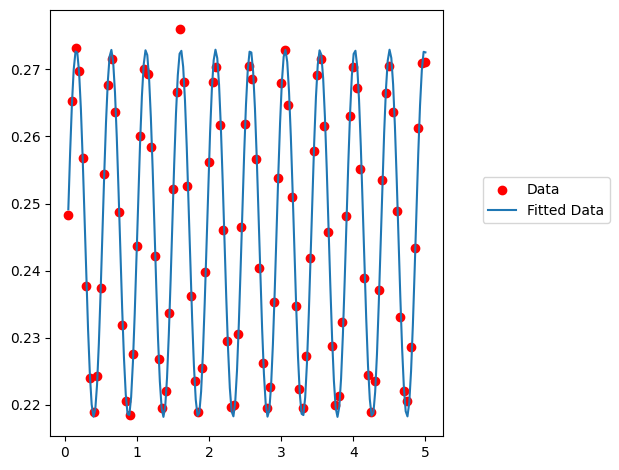

In [ ]:
# Generate points for the curve fit data
fit_x = np.linspace(exp_data["Time (s)"].iloc[0], exp_data["Time (s)"].iloc[-1],200)
fit_y = spring_eq(fit_x, *params)

# Graph the raw data and curve fit data
plt.scatter(exp_data["Time (s)"], exp_data["Position (m)"], label='Data', color = "red")
plt.plot(fit_x, fit_y,label="Fitted Data")

plt.legend(loc=(1.1,0.5))
plt.tight_layout()
plt.show()

In [ ]:
# Print out the regression data:
print(f'Amplitude = {abs(params[0]):.2f}')
print(f'Omega = {abs(params[1]):.2f}')
print(f'Phi = {abs(params[2]):.2f}')
print(f'Offset = {abs(params[3]):.2f}')

Amplitude = 0.03
Omega = 13.02
Phi = 5.23
Offset = 0.25


**Follow-Up questions**

5.   How well did the fitted function match your data?


6.  In the beginning of this lab, you were able to calculate the spring constant of your spring. How well does that compare with the modeled value from the curve fit?


7.   Some groups might notice that the amplitude of their data decreases over time. Why do you think that occurs?

8. Would the fitted graph take that into account? (and if not, how do you think we could change the fit to better model that?)

9. Should we use this model to simulate a mass on a spring? Justify your response.

**Coding Extension Task**
10.  Go back to the theoretical model we made at the top of this document. Change the values for A, k, m, etc to match the values from the curve fit. Then create a plot in the code block below of the new theoretical data and your actual data on the same plot.


In [ ]:
# I'm a code block! Use me to answer question #10

#Summary / Conclusion Paragraph#


In the space below summarize the results of this experiment in CER format.